**MNIST Handwritten Digit Clasification using Deep Learning (Neural Network)**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

# Loading MNIST data

In [2]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
type(X_train)

numpy.ndarray

In [5]:
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [16]:
print(Y_train)
print(X_train)


[5 0 4 ... 5 6 8]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


Training Data = 60000 Images
Test Data - 10000 Images

Dimension Image - 28 * 28

Grayscale Image

In [19]:
print(X_train[0].shape)

(28, 28)


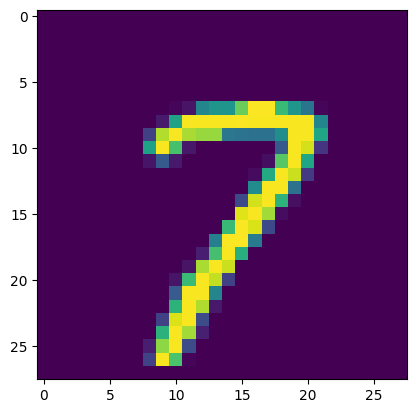

In [23]:
plt.imshow(X_train[230])
plt.show()

Image Labels

In [25]:
print(Y_train.shape,Y_test.shape)

(60000,) (10000,)


In [24]:
# unique values in train
print(np.unique(Y_train))
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


### We can use the label or One Hot encoding

All the images have the same dimension in this dataset

if not , we have to resize all of them in same dimension

## Scaling the values (Data Normalization / Standardization)

In [26]:
# Scaling the values

X_train = X_train/255
X_test = X_test/255

### Building the Neural Network

In [33]:
# setting up layers of neural network

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #inputs/ feature numbers 1D for column , 2D for Grayscale Image , 3D for RGB image
    keras.layers.Dense(50 , activation='relu'), # Hidden Layer - activation='relu' rectified linear units
    keras.layers.Dense(50 , activation='relu'),
    keras.layers.Dense(10 , activation='sigmoid')
]) # ouput Layer - Sigmoid function
    # ouput Layer - 10 cause there is 10 class (0 to 9  )

In [39]:
#compiling NN

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

If you want to use "categorical_crossentropy", the labels should be one-hot-encoded. When your labels are given as an integer, changing to "sparse_categorical_crossentropy" is required. The advantage of using "categorical_crossentropy" is that it can give you class probabilities, which might be useful in some cases.

Accuracy on Train Data

In [40]:
## training the network (1 min)

Digit_NN=model.fit(X_train, Y_train, epochs=10) #epochs is how many times data will go through the model


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2968 - accuracy: 0.9148
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1369 - accuracy: 0.9592
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1013 - accuracy: 0.9691
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0817 - accuracy: 0.9749
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0683 - accuracy: 0.9793
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0587 - accuracy: 0.9816
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0521 - accuracy: 0.9835
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0445 - accuracy: 0.9859
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0405 - accuracy: 0.9870
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.036

# Accuracy on test Data

In [47]:
loss, accuracy = model.evaluate(X_test,Y_test)
print(loss,accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1017 - accuracy: 0.9732
0.10169310122728348 0.9732000231742859


##Test Data Accuracy --> 97.3%

7


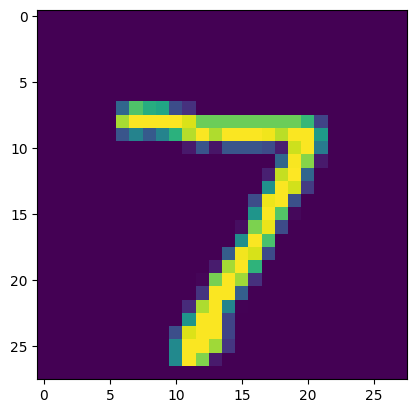

In [51]:
# first Data point in X_test
print(Y_test[0])
plt.imshow(X_test[0])  ## Bole JO koyel

In [54]:
Y_pred = model.predict(X_test)
print(Y_pred.shape)
print(Y_pred[0])

313/313 [==============================] - 1s 2ms/step
(10000, 10)
[1.2023585e-02 1.9965626e-06 4.2970944e-02 4.9578351e-01 1.2717669e-07
 8.5825450e-06 1.6809011e-13 9.9996650e-01 3.0293181e-03 2.9481903e-01]


In [55]:
label_for_first_image= np.argmax(Y_pred[0]) # index of max value - argmax#
print(label_for_first_image)
#print(Y_test.head())

7


### Converting the prediction_probabilities to class_label

In [57]:
# Converting the prediction_probabilities to class_label

Y_pred_labels=[np.argmax(i) for i in Y_pred] # index of max value - argmax#
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 5, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 1, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

Y_test --> True Labels

Y_pred  --> Probability labels

Y_pred_labels --> Class labels

### Confusion Matrix

In [59]:
conf_mat = confusion_matrix(Y_test, Y_pred_labels)
print(conf_mat)

tf.Tensor(
[[ 962    0    0    2    0    5    5    2    4    0]
 [   0 1126    3    3    0    1    1    0    1    0]
 [   6    1  998    8    2    0    1    8    8    0]
 [   0    0    1  987    0    6    0    6    5    5]
 [   0    1    5    0  951    0    8    1    1   15]
 [   1    0    0   12    1  864    5    1    5    3]
 [   2    3    2    1    3    4  938    1    4    0]
 [   1   10   10    0    2    0    0 1000    0    5]
 [   5    3    6    9    4    8    0    3  930    6]
 [   1    3    0    6   12    3    1    7    0  976]], shape=(10, 10), dtype=int32)


Text(0.5, 25.722222222222214, 'Predicted Labels')

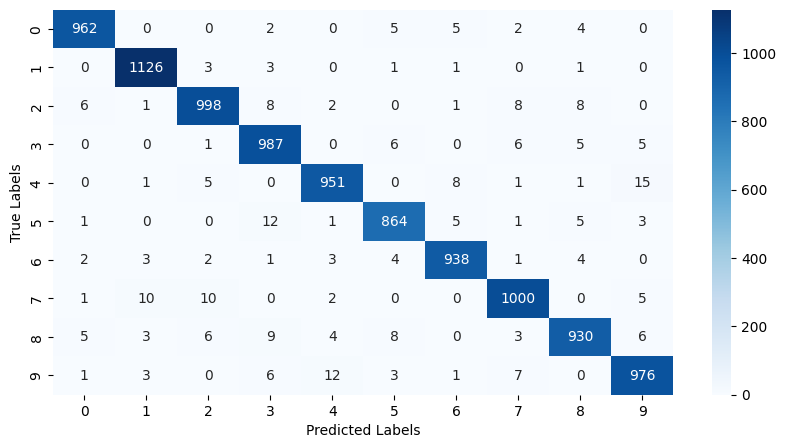

In [64]:
plt.figure(figsize=(10,5))
sns.heatmap(conf_mat , annot=True ,fmt='d' , cmap='Blues')  #fmt d- integer value
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')

## Building the predictive System

(259, 260, 3)


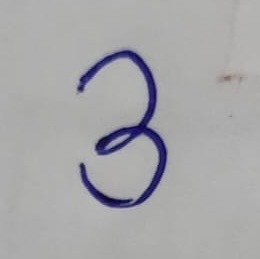

In [112]:
input_image_path= '/content/drei.jpg'
input_img=cv2.imread(input_image_path)
print(input_img.shape)
cv2_imshow(input_img)

dimension check and RGB channel check  ---> Grayscale

### --> Transforming to Grayscale Image

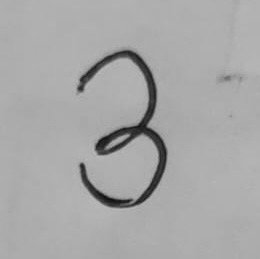

In [113]:
gs_input_img = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)
gs_input_img.shape
cv2_imshow(gs_input_img)


### Resizing the Image

In [114]:
gs_input_res = cv2.resize(gs_input_img,(28,28))
print(gs_input_res.shape)
cv2_imshow(gs_input_res)

(28, 28)


### Data Standardization and Reshaping the array

In [115]:
gs_input_res= gs_input_res/255
#gs_input_res= gs_input_res-1
#gs_input_res= gs_input_res*(-1)
reshaped_gs_input_res = np.reshape(gs_input_res, [1,28,28]) ## Reshaping

In [116]:
input_prediction=model.predict(reshaped_gs_input_res)
print(input_prediction)
print([round(i,3) for i  in input_prediction[0]])
prediction=[np.argmax(input_prediction)]
#print(input_data_np_arr)
#print(input_data_reshaped)
print('\n\nDigit Classified is : '+ str(prediction[0]))


1/1 [==============================] - 0s 24ms/step
[[2.7549990e-02 1.0985575e-15 9.9999726e-01 9.9885577e-01 5.1947677e-37
  9.0868986e-01 3.3380690e-12 4.8884910e-02 9.3273469e-05 1.2146394e-10]]
[0.028, 0.0, 1.0, 0.999, 0.0, 0.909, 0.0, 0.049, 0.0, 0.0]


Digit Classified is : 2


## Final WHole Code - Predictive Sytem

(238, 238, 3)


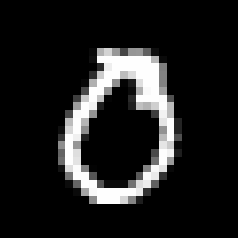

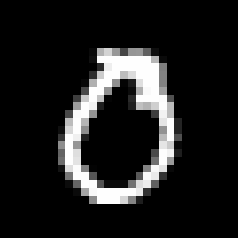

(28, 28)


1/1 [==============================] - 0s 30ms/step
[[9.9995708e-01 1.1050850e-07 1.9762097e-01 4.2079566e-03 1.5490168e-06
  3.6020640e-02 4.8719676e-07 8.6628568e-01 1.3537930e-02 4.7216266e-01]]
[1.0, 0.0, 0.198, 0.004, 0.0, 0.036, 0.0, 0.866, 0.014, 0.472]
Digit Classified is : 0


In [131]:
input_image_path= 'zero.jpg'
input_img=cv2.imread(input_image_path)
print(input_img.shape)
cv2_imshow(input_img)
gs_input_img = cv2.cvtColor(input_img,cv2.COLOR_RGB2GRAY)
gs_input_img.shape
cv2_imshow(gs_input_img)
gs_input_res = cv2.resize(gs_input_img,(28,28))
print(gs_input_res.shape)
cv2_imshow(gs_input_res)
gs_input_res= gs_input_res/255
#gs_input_res= gs_input_res-1
#gs_input_res= gs_input_res*(-1)
reshaped_gs_input_res = np.reshape(gs_input_res, [1,28,28]) ## Reshaping
input_prediction=model.predict(reshaped_gs_input_res)
print(input_prediction)
print([round(i,3) for i  in input_prediction[0]])
prediction=[np.argmax(input_prediction)]
print('Digit Classified is : '+ str(prediction[0]))